In [29]:
import numpy as np
import pandas as pd

In [30]:
df=pd.read_csv("exams.csv")

In [31]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [32]:
df.shape

(1000, 8)

In [33]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
df.duplicated().sum()

0

Data pre-processing For ML Modelling

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Using Lablel Encoder to change catogory columns to numeric equalent for regression
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

#Normalization
scaler = StandardScaler()
df[['reading score', 'writing score']] = scaler.fit_transform(df[['reading score', 'writing score']])

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print('Training score:', train_score)
print('Testing score:', test_score)

Training score: 0.2553000753342305
Testing score: 0.2921180999151841


In [40]:
df = pd.read_csv("exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [41]:
import pandas_profiling
prof = pandas_profiling.ProfileReport(df)
prof.to_file(output_file='output.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Shape of your Data Set loaded: (1000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
math score,79,int64,0,0.000000,7.900000,0,
reading score,71,int64,0,0.000000,7.100000,0,
parental level of education,6,object,0,0.000000,0.600000,75,
race/ethnicity,5,object,0,0.000000,0.500000,79,
gender,2,object,0,0.000000,0.200000,492,
lunch,2,object,0,0.000000,0.200000,340,
test preparation course,2,object,0,0.000000,0.200000,344,


    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


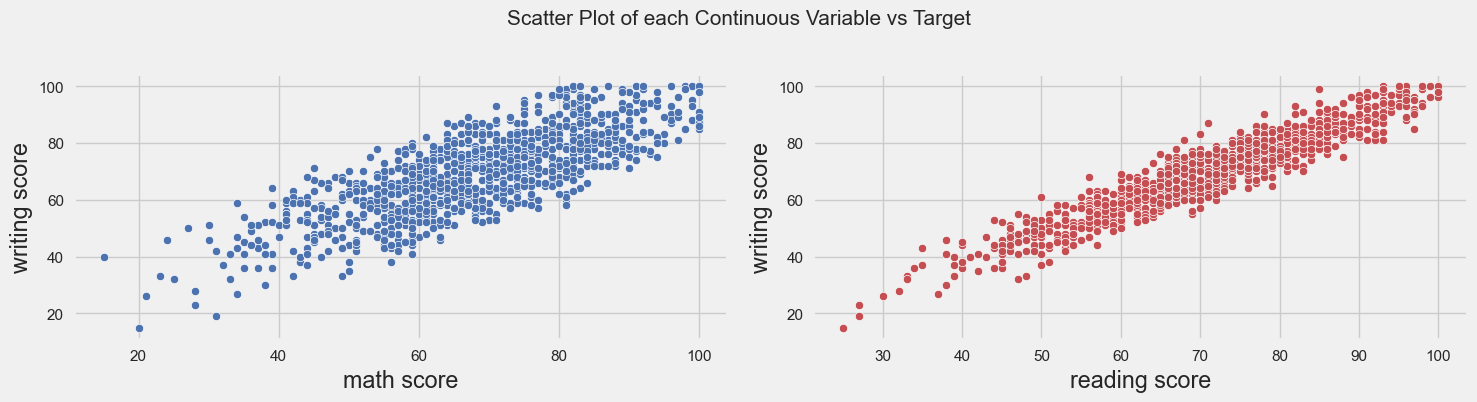

Number of All Scatter Plots = 3


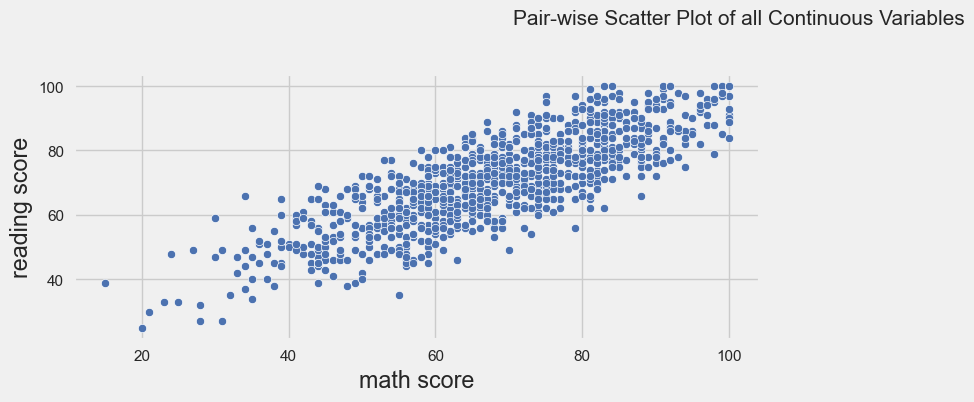

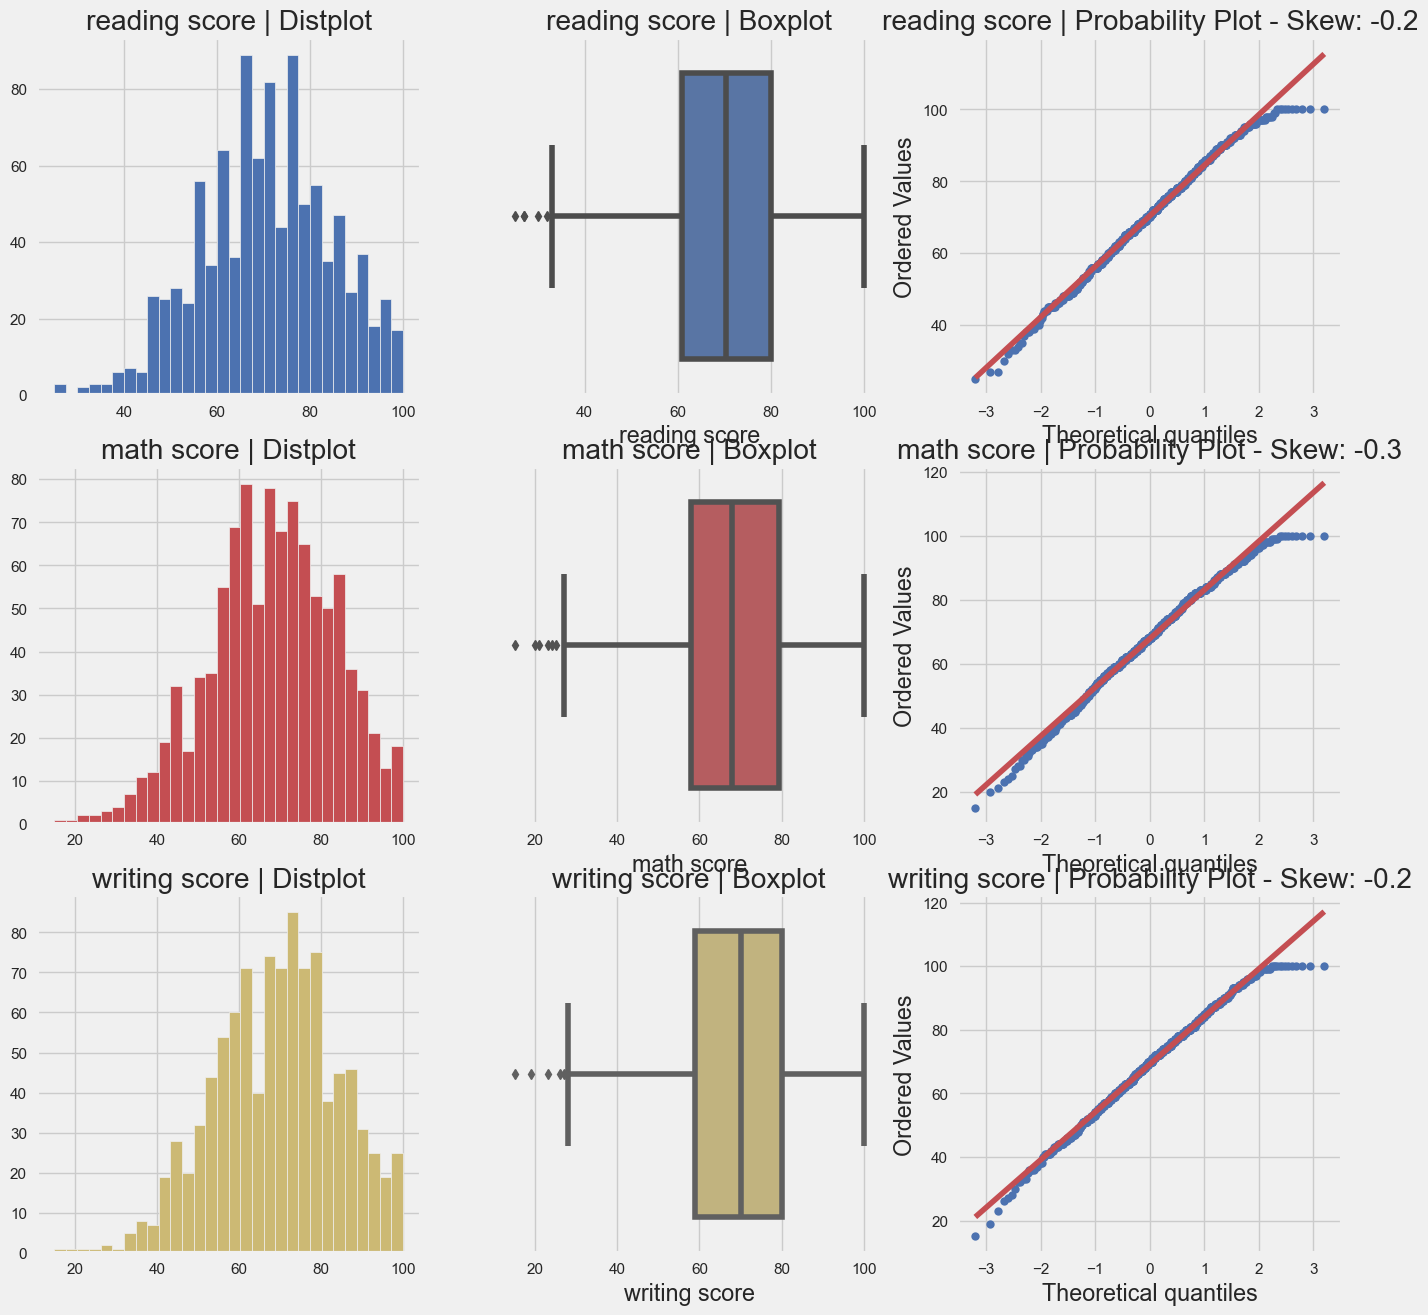

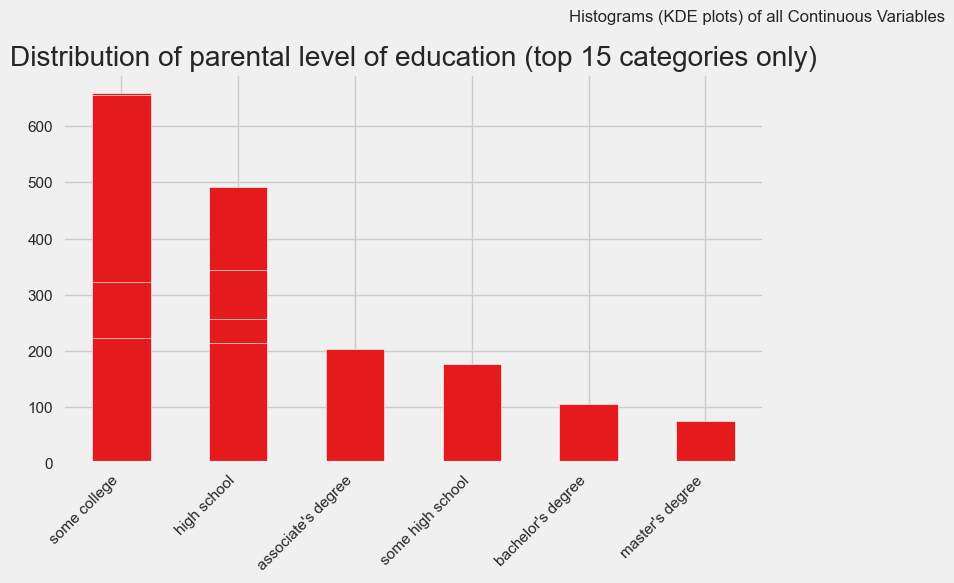

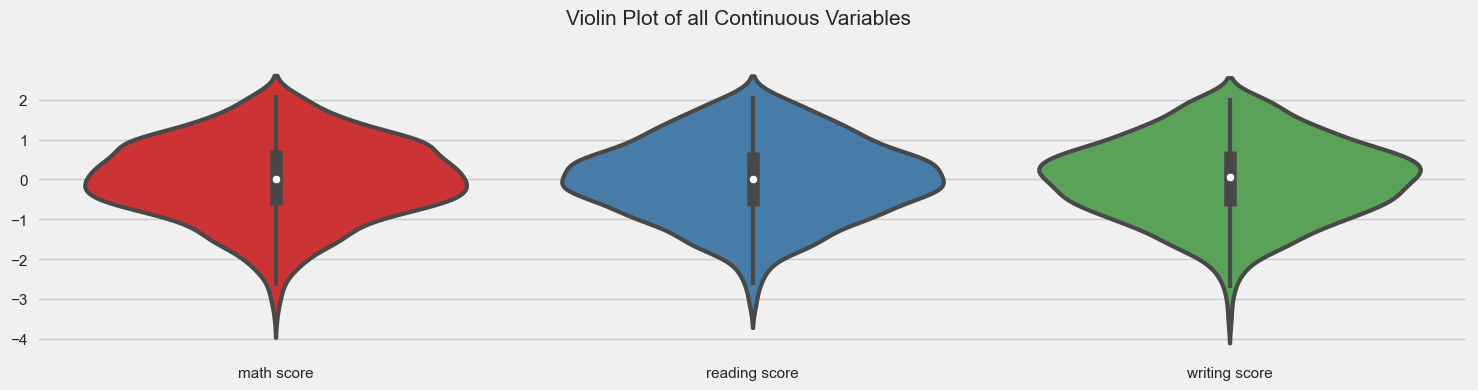

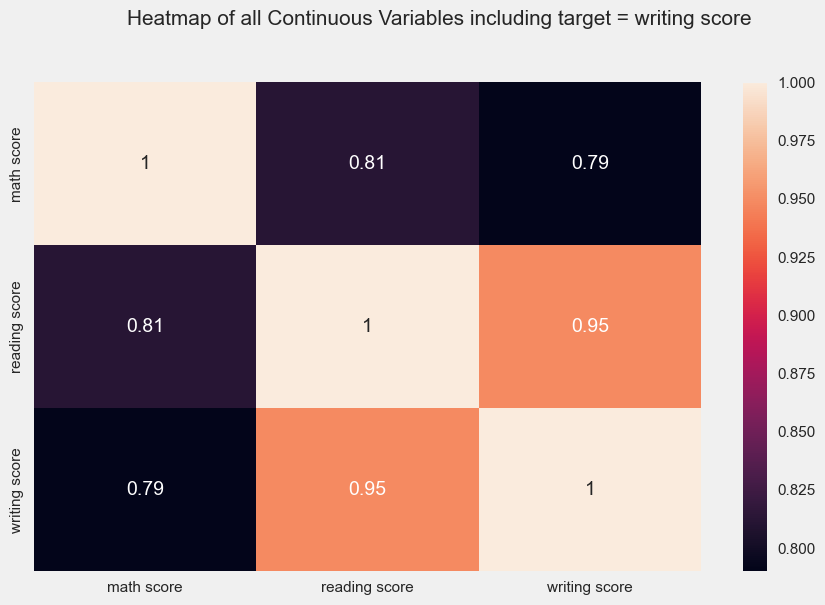

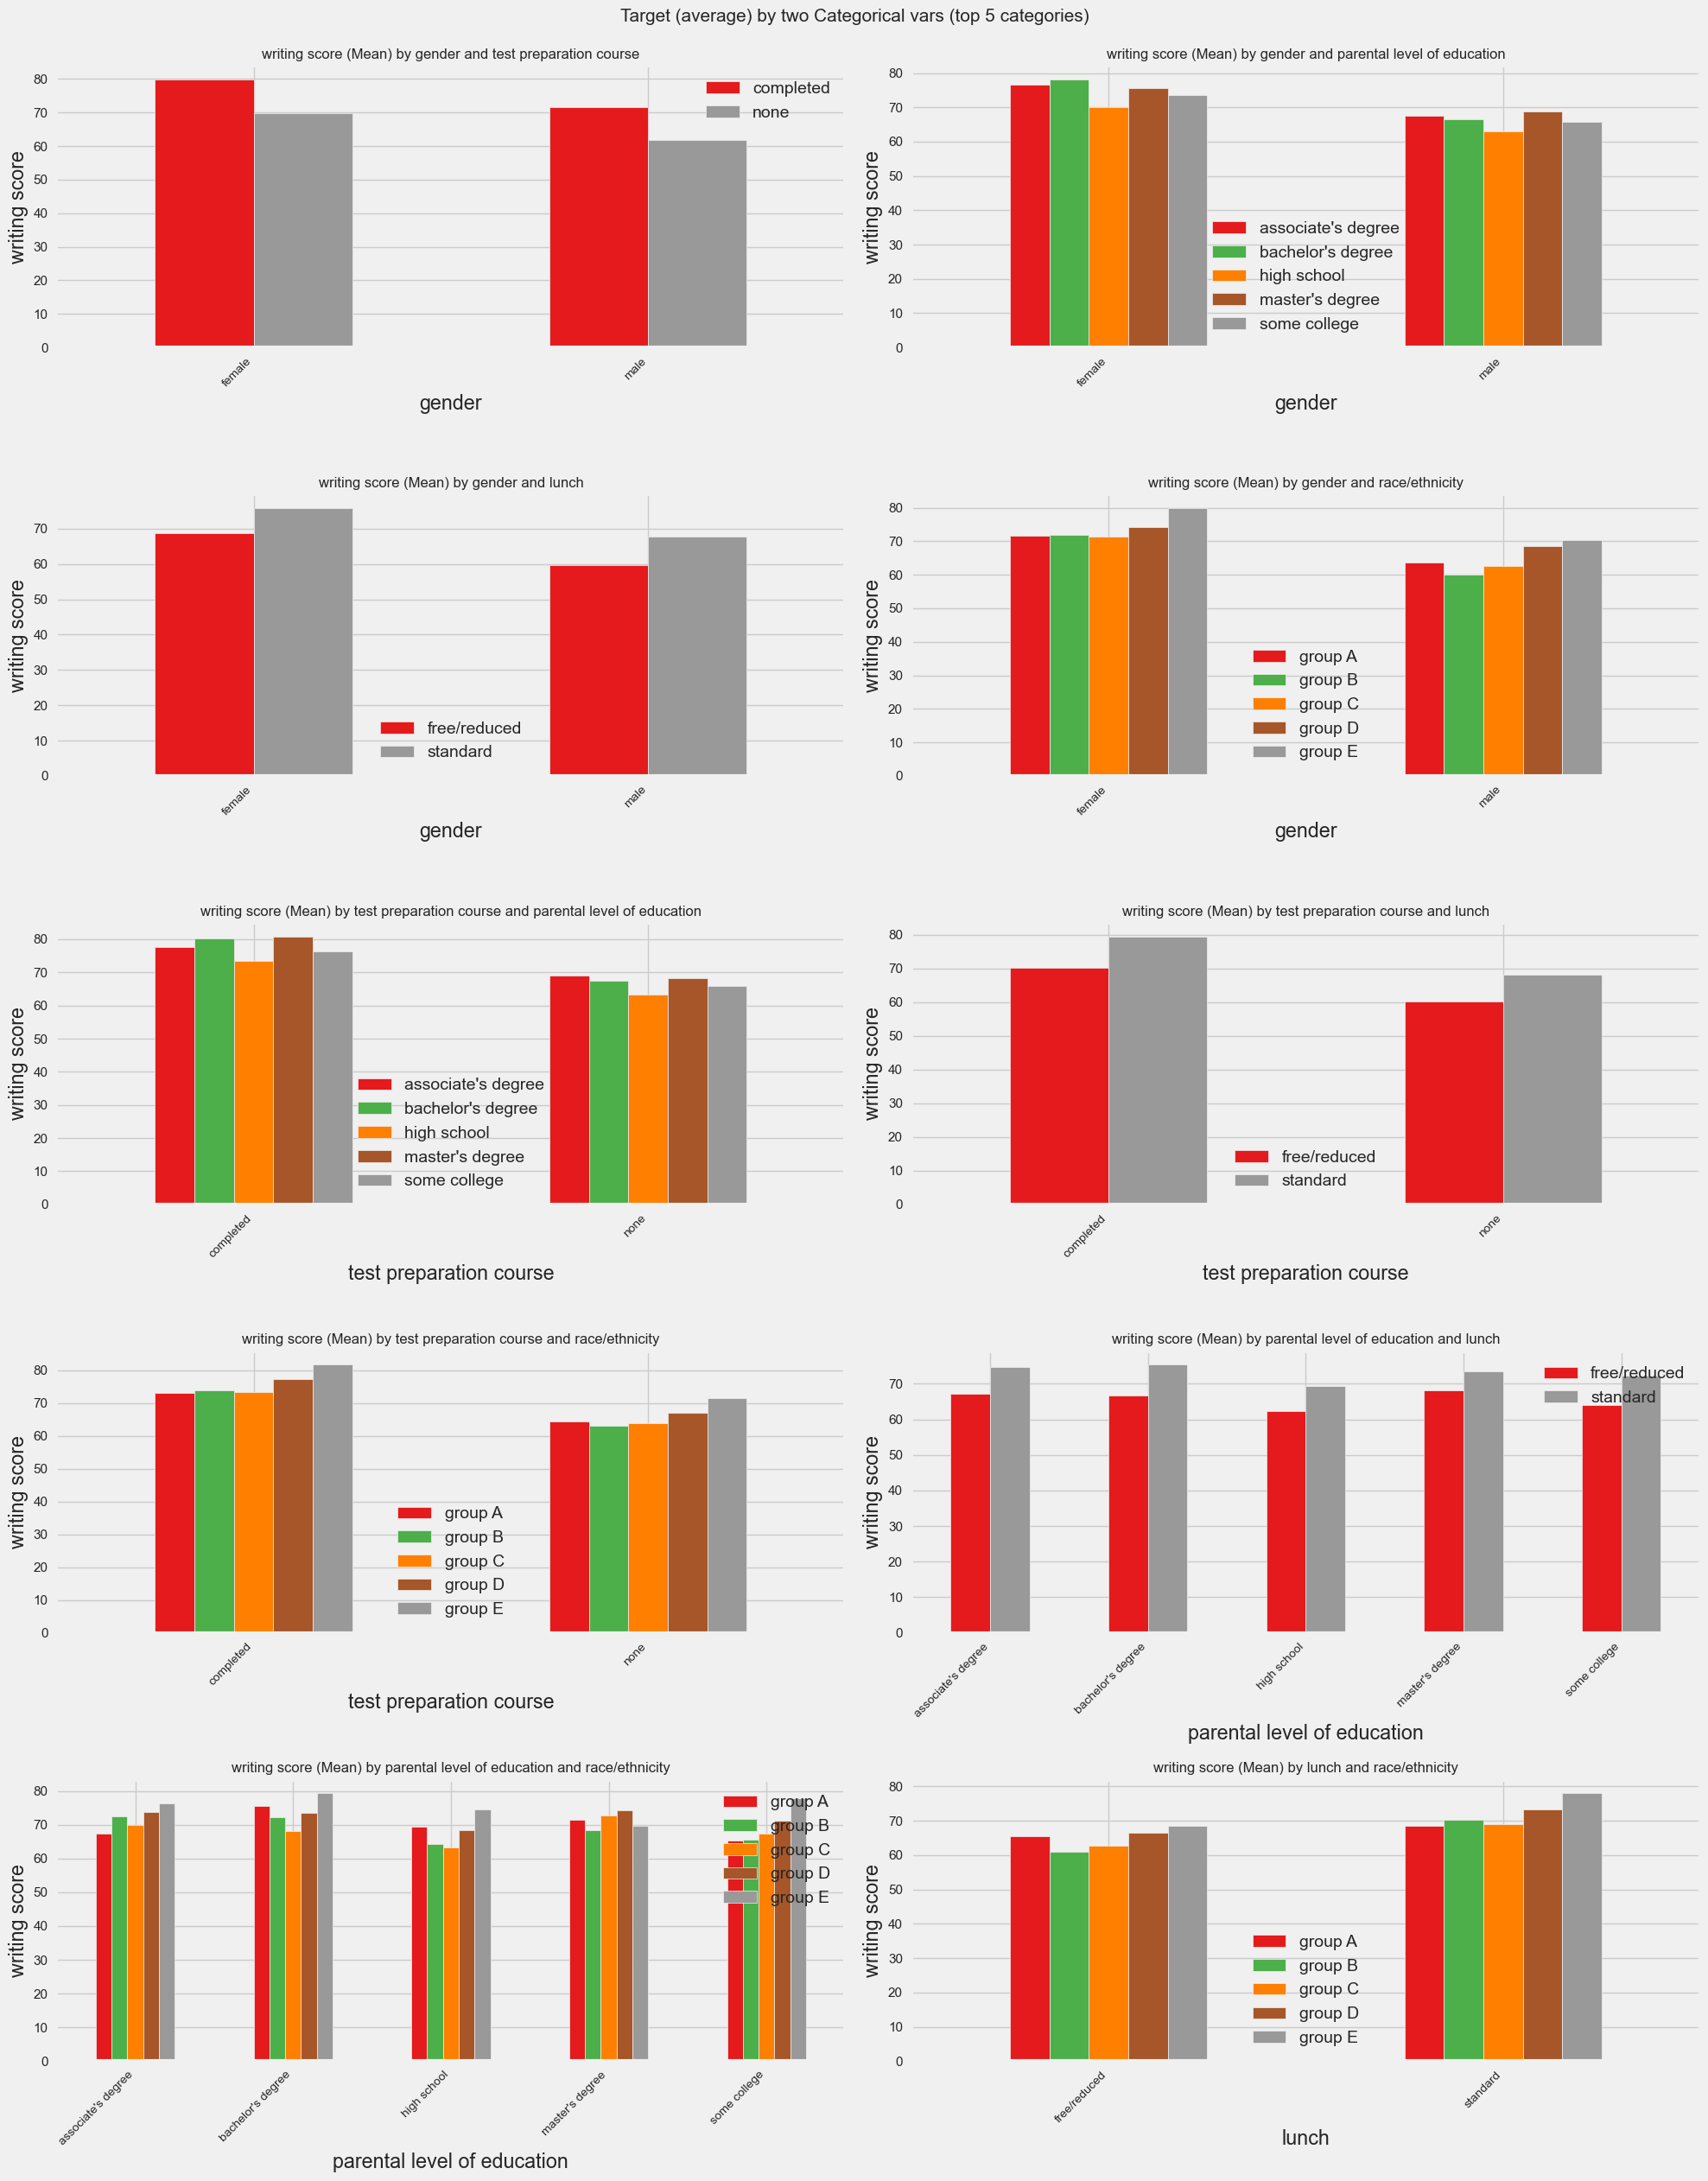

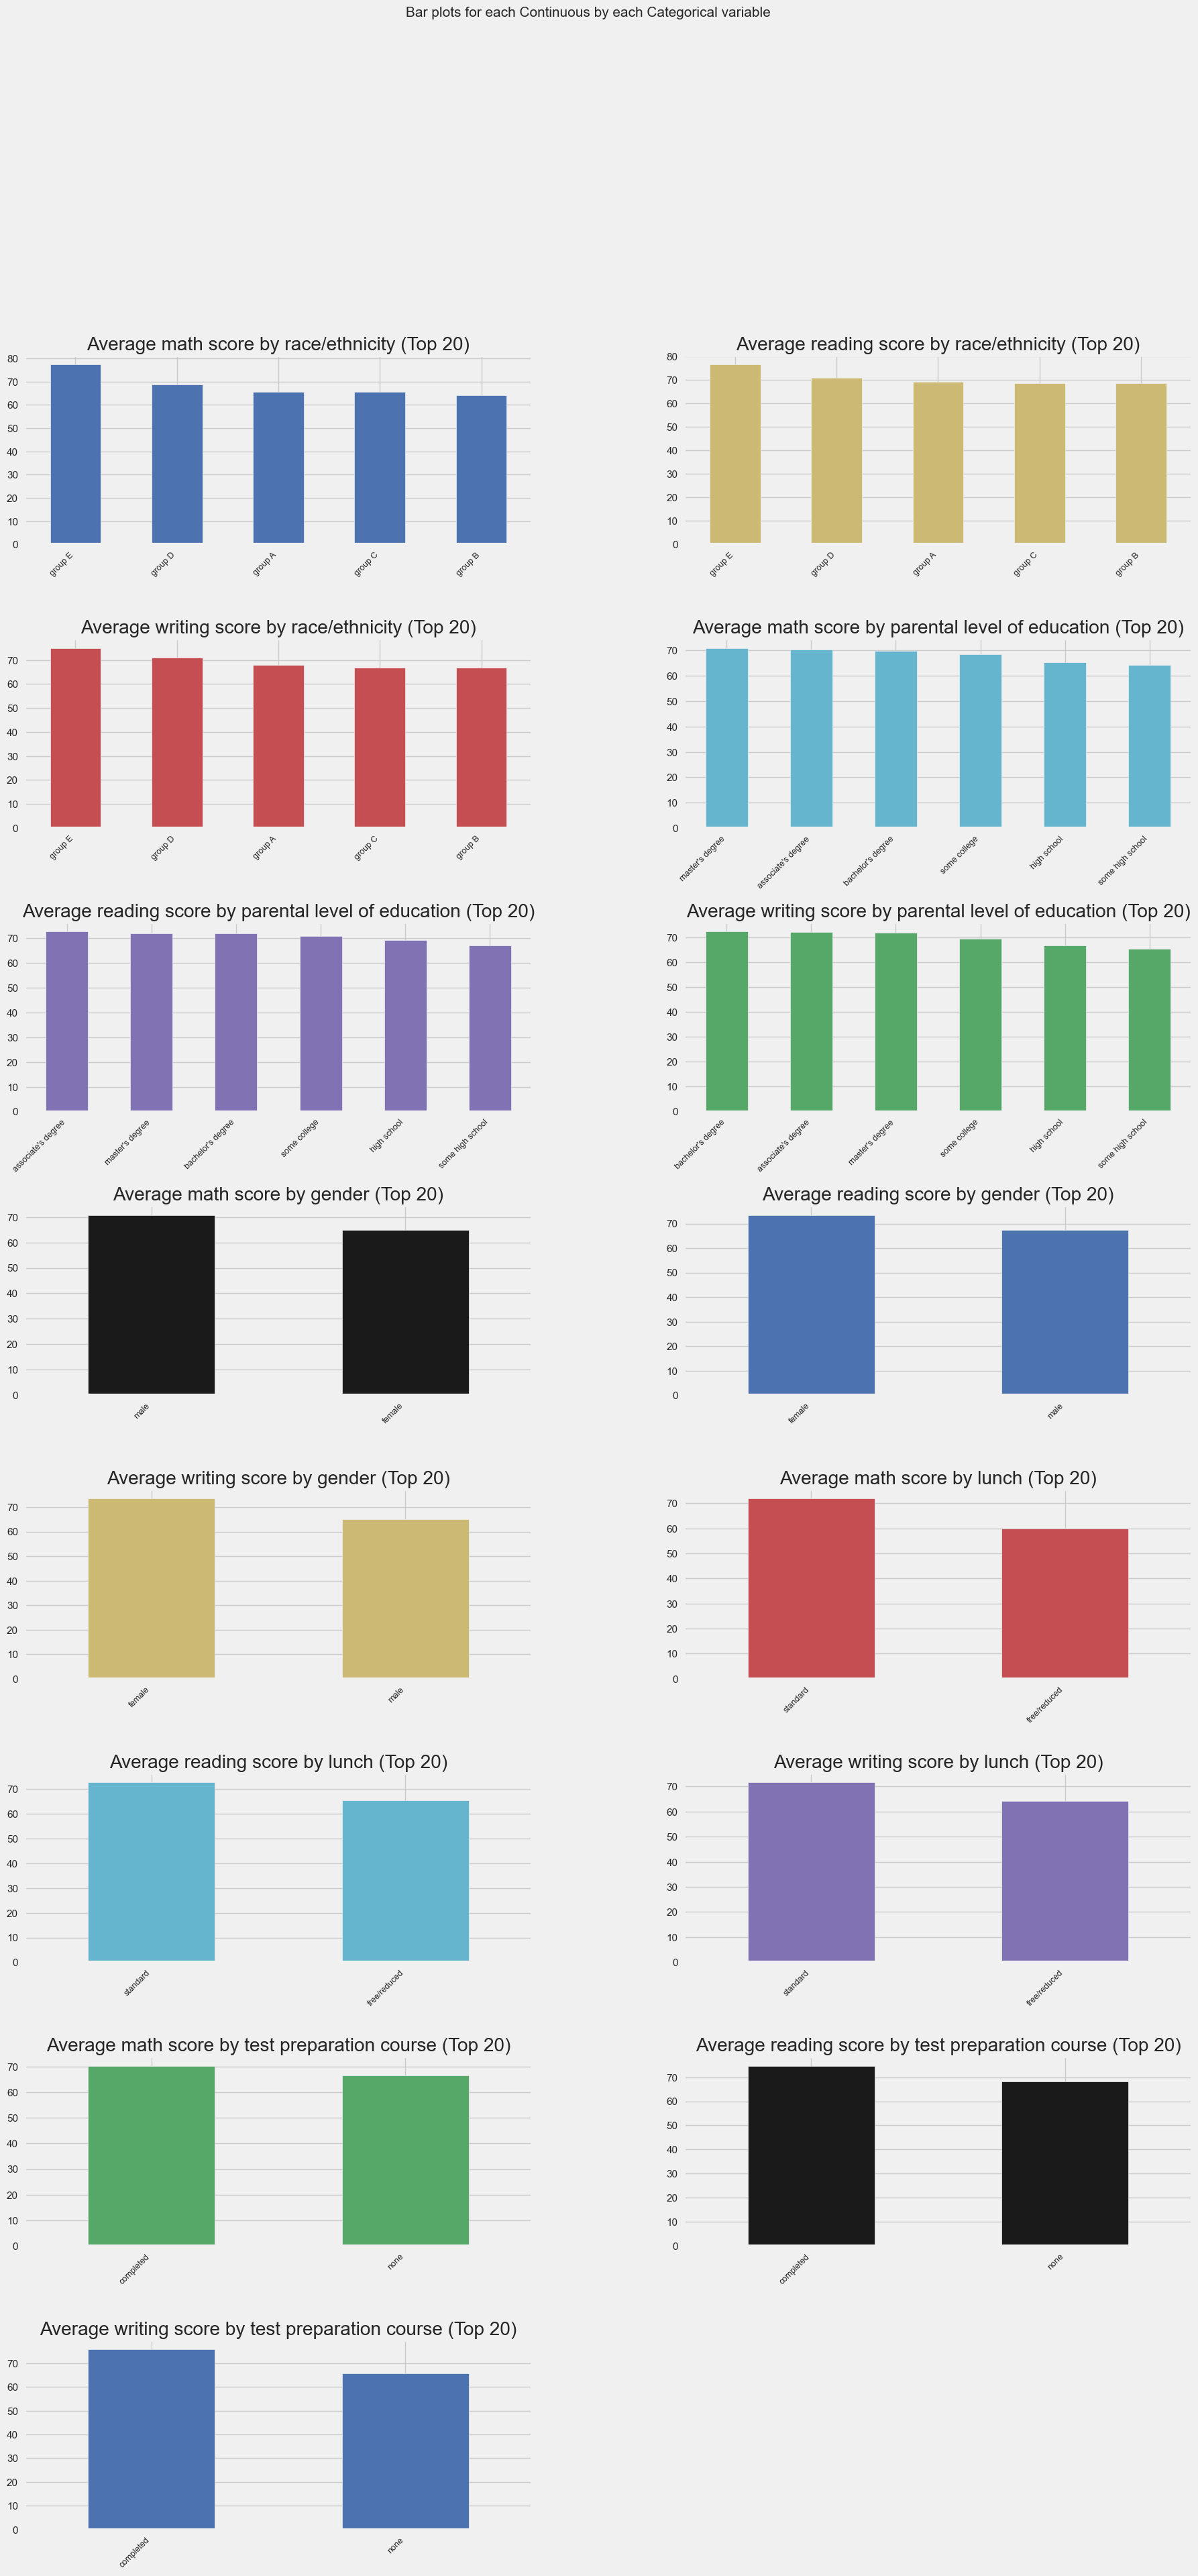

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
dft = AV.AutoViz(
    None,
    dfte=df,
    verbose=1,
    depVar="writing score",
    chart_format="svg",
)